# STEAM EDA PROJECT
### Got the project from one of my favorite data YouTubers Shashank Kalanithi

The video is called "Day in the Life of a Data Analyst: Stakeholder ➡️ Co-Worker ➡️ SQL ➡️ Python ➡️ Visualizations"
[Click Here To View](https://youtu.be/4VkAwPYgSgk)

The project consists of a fraction of Steam data (about 1 million records). The goal of the project is to fulfill a stakeholder's request.
The goal is to define what a "top reviewer" is and to find the top 1000 reviewers based on definition of a "top reviewer" to create an incentive and rewarding these users for creating reviews for games.


In [1]:
# Importing data into data frames
import pandas as pd

author_import = pd.read_csv("data/author_info.csv")
game_import = pd.read_csv("data/game_info.csv")
purchase_import = pd.read_csv("data/purchase_info.csv")
review_import = pd.read_csv("data/review_info.csv")

I'm looking for an overview of what data I have and joining the tables together
review_id is the primary/forein key among all tables
adding columns that I think may be useful for analysis
storing the query into variable df_1

In [2]:


df_1 = _deepnote_execute_sql("""select a.review_id, 
language, 
review, 
timestamp_created, 
timestamp_updated, 
recommended, 
votes_helpful, 
votes_funny, 
weighted_vote_score, 
comment_count, 
steam_purchase, 
received_for_free, 
written_during_early_access, 
app_name, 
-- needed to change the datatype for steam_id because it would not mesh with Python well as an integer.
-- also needed to change names with '.' in it to not confuse Python
CAST("author.steamid" as varchar(20)) as steam_id, 
"author.num_games_owned" as num_games_owned,
"author.num_reviews" as num_reviews,
"author.playtime_forever" as playtime_forever,
"author.playtime_last_two_weeks" as playtime_last_two_weeks,
"author.playtime_at_review" as playtime_at_review,
"author.last_played" as last_played

-- Joined all tables based off of review_id keyword USING to not have repeated review_id columns
from review_import a
join purchase_import 
using (review_id)
join game_import
using (review_id)
join author_import
using (review_id)


""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_1

,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,...,received_for_free,written_during_early_access,app_name,steam_id,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,68675252,russian,"Божечки, это же 10/10",1588772815,1588772815,True,0,0,0.000000,0,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561198199699706,56,3,5552.0,0.0,5517.0,1.588775e+09
1,68675154,english,"What can I say, the best game ever?\nThe BEST ...",1588772690,1588772690,True,0,0,0.000000,0,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561198320854803,112,8,33707.0,0.0,27915.0,1.593310e+09
2,68674806,english,good,1588772228,1591709306,True,1,0,0.523810,0,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561198282201987,17,9,3166.0,0.0,2633.0,1.603555e+09
3,68673945,russian,WDPSLDFLZLD\n,1588771138,1588771138,True,0,0,0.000000,0,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561199016358734,3,2,6579.0,0.0,3569.0,1.608999e+09
4,68670882,russian,"Спешл эдишн дали халявно, т.к. ранее покупал о...",1588767094,1588767094,True,0,0,0.000000,0,...,True,False,The Elder Scrolls V: Skyrim Special Edition,76561198236134140,39,5,10588.0,0.0,10441.0,1.593180e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,47313627,russian,"Всем салют! Сразу скажу, что я, как очевидно и...",1544037600,1544037669,True,2,1,0.519231,0,...,False,False,Just Cause 4,76561198024373318,33,2,5209.0,0.0,770.0,1.606487e+09
999996,47312189,english,I'm a huge fan of the Just Cause games. I'm h...,1544032003,1544477906,True,0,0,0.000000,0,...,False,False,Just Cause 4,76561198069526558,346,25,1208.0,0.0,897.0,1.545581e+09
999997,47311444,russian,"Такое, графон хуже чем в 3-ей части и настраив...",1544029102,1557728716,False,0,0,0.453288,0,...,False,False,Just Cause 4,76561198274852040,208,198,193.0,0.0,94.0,1.563397e+09
999998,47310773,schinese,1060 7700k 16G 3d错误窗口什么鬼？游戏卡死闪退什么鬼？卡死重启游戏都进不去又...,1544026423,1544026423,False,0,0,0.476190,0,...,False,False,Just Cause 4,76561198828700527,13,1,1718.0,0.0,703.0,1.579521e+09


In [3]:
# Checking datatypes to make sure that each data type makes sense to the column

df_1.dtypes

review_id                        int64
language                        object
review                          object
timestamp_created                int64
timestamp_updated                int64
recommended                       bool
votes_helpful                    int64
votes_funny                      int64
weighted_vote_score            float64
comment_count                    int64
steam_purchase                    bool
received_for_free                 bool
written_during_early_access       bool
app_name                        object
steam_id                        object
num_games_owned                  int64
num_reviews                      int64
playtime_forever               float64
playtime_last_two_weeks        float64
playtime_at_review             float64
last_played                    float64
dtype: object

In [4]:
# Which users (steam_ids) had the most 'votes_helpful' on their reviews?

# Manipulating data with Pandas to find which users had the most 'votes_helpful' on their reviews

# group by the 'steam_id' (some users could have made multiple reviews) = df_1.groupby("steam_id")
# and add all 'votes_helpful' per review per user = ["votes_helpful"].sum()
# Labeling columns with column name = .reset_index()
# Sorting from highest to lowest 'votes_helpful' totals = .sort_values("votes_helpful", ascending = False)

df_1.groupby("steam_id")["votes_helpful"].sum().reset_index().sort_values("votes_helpful", ascending = False)

,steam_id,votes_helpful
675371,76561198301678331,26149
280175,76561198068792591,15526
396630,76561198107977827,14349
252475,76561198060932732,10610
563810,76561198193312194,10495
...,...,...
393872,76561198106854665,0
393873,76561198106856153,0
393875,76561198106856636,0
393876,76561198106856949,0


In [5]:
# Which users had the most reviews done? 
# Assigning earlier code sequence as 'top_voted_reviews'

# Using Pandas again to find which users have done the most reviews

# group by the 'steam_id' (some users could have made multiple reviews) = df_1.groupby("steam_id")
# Counting the amount of different reviews (review_id) that are tied to the same user = ["review_id"].count()
# Labeling columns with column name = .reset_index()
# Sorting values by highest amount of reviews made per user to lowest

top_voted_reviews = df_1.groupby("steam_id")["votes_helpful"].sum().reset_index().sort_values("votes_helpful", ascending = False)
most_reviews = df_1.groupby("steam_id")["review_id"].count().reset_index().sort_values("review_id", ascending = False)
most_reviews


,steam_id,review_id
691805,76561198315585536,22
605538,76561198239163744,20
258582,76561198062813911,19
200553,76561198045381877,17
277670,76561198068116100,17
...,...,...
319902,76561198080424312,1
319903,76561198080424324,1
319904,76561198080424388,1
319905,76561198080424757,1


In [6]:
# Merging the two dataframes to see if there are any One-Hit-Wonders (ohw)

# this is an inner join of top_voted_reviews and most_reviews
ohw = pd.merge(left = top_voted_reviews, right = most_reviews, on = "steam_id", how = "inner")
ohw

,steam_id,votes_helpful,review_id
0,76561198301678331,26149,1
1,76561198068792591,15526,1
2,76561198107977827,14349,1
3,76561198060932732,10610,2
4,76561198193312194,10495,1
...,...,...,...
912548,76561198106854665,0,2
912549,76561198106856153,0,1
912550,76561198106856636,0,1
912551,76561198106856949,0,1


In [7]:
# Using plotly to create a QUICK clean data visualization
# would normally use matplotlib, but plotly is easy and quick to use
import plotly.express as px

# Creating a histogram of the Reviews per Reviewer (based on ohw dataframe)
px.histogram(ohw, x = "review_id", template = "simple_white", title = "Reviews per Reviewer")


# Analysis of Top Reviewers

Over 92% of reviewers have only reviewed a single game, more than likely, the stakeholders probably won't be giving gift incentives to people who have only written one review with high amount of votes.

In this case, let's say having 3 or more reviews will qualify for the incentive.

In [8]:
# Creating an analysis using a Pareto chart to show what percentage of the population of the dataframe
# has made a review or more
# Using cumulative percentage and creating a dataframe with the added column 'cumperc'

    # Code was found using site below, but changed to work with my dataframe:
    # statology.org/pareto-chart-python/

review_count = ohw.groupby("review_id")["steam_id"].count().reset_index()
review_count['cumperc'] = review_count['steam_id'].cumsum()/review_count['steam_id'].sum()*100
review_count

,review_id,steam_id,cumperc
0,1,843838,92.470026
1,2,56007,98.607423
2,3,9085,99.602982
3,4,2340,99.859405
4,5,751,99.941702
5,6,280,99.972385
6,7,112,99.984658
7,8,53,99.990466
8,9,43,99.995178
9,10,26,99.998028


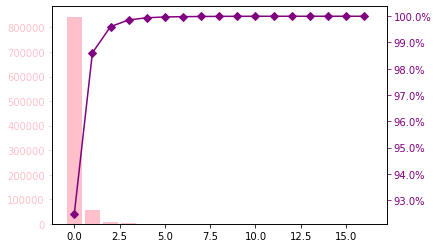

In [9]:
# Creating our Pareto chart using matplotlib and pyplot

    # Code was found using site below, but changed to work with my dataframe:
    # statology.org/pareto-chart-python/

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'pink'
color2 = 'purple'
line_size = 6

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(review_count.index, review_count['steam_id'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(review_count.index, review_count['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

DeepNote has the ability to add cells made for visualizations. 

For example, sliders which represent conditions 
(user must review x amount of games and have more than y amount of votes_helpful to be a top reviewer):

Change the below sliders to look at different cohorts (amount of top reviewers)

In [10]:
games_reviewed = 3

In [11]:
votes_helpful = 400

In [13]:
# Creating a dynamic dataframe based on the sliders (games_reviewed and votes_helpful)
# top_reviewers_df is a dataframe that has all of the information from the very first dataframe created, 
# but with only top reviewers

top_reviewers = ohw[(ohw["votes_helpful"] >= votes_helpful) & (ohw["review_id"] >= games_reviewed)]["steam_id"].values
top_reviewers_df = df_1[df_1["steam_id"].isin(top_reviewers)]
top_reviewers_df

,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,...,received_for_free,written_during_early_access,app_name,steam_id,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
34733,54836996,russian,Оригинальная игра и DLC к ней: \nhttps://store...,1566902925,1566902925,False,633,23,0.896432,33,...,True,False,The Elder Scrolls V: Skyrim Special Edition,76561198061514868,1513,231,4193.0,0.0,4193.0,1.547179e+09
42459,51112620,schinese,1000小时后过来发评测。\n游戏本体内容和MOD扩展性相关的东西我就不说了，大家看其他人的...,1559978589,1559978589,True,258,19,0.932274,12,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561198043336844,211,49,93971.0,0.0,60771.0,1.581237e+09
44193,49704965,english,The Canadian winter of 2011: I remember it wel...,1553305262,1553305354,True,655,227,0.942581,41,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561198010371788,570,153,1994.0,0.0,586.0,1.588529e+09
44364,49467832,english,"a sound track of glory, an adventure of hardsh...",1552169306,1552169306,True,0,0,0.000000,0,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561198199811506,146,41,2789.0,0.0,604.0,1.595256e+09
45343,48643868,english,Buy it for skyrim together,1548846113,1548846113,True,810,107,0.951849,27,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561198097450702,323,135,786.0,0.0,481.0,1.575289e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983060,47485053,english,[b]The [i]Kingdom[/i] series has always had a ...,1544629977,1544630167,True,44,2,0.795707,16,...,False,False,Kingdom Two Crowns,76561198040884867,1858,903,446.0,0.0,325.0,1.545181e+09
993205,56763901,russian,"Все твои злейшие враги в этой игре - женщины, ...",1573225007,1573225074,True,7,5,0.509776,0,...,False,False,Just Cause 4,76561198061514868,1513,231,399.0,0.0,96.0,1.573479e+09
993360,56720280,english,­,1573162869,1573162869,True,46,7,0.405999,0,...,False,False,Just Cause 4,76561198315585536,1350,1105,43.0,0.0,6.0,1.573267e+09
993395,56654620,english,I'm really torn on writing this review. Just C...,1573075860,1573673723,True,461,18,0.947325,41,...,False,False,Just Cause 4,76561198027141250,1428,135,3767.0,0.0,827.0,1.577301e+09


In [14]:
# Print out the values for the cohort size

print("Cohort size: ", len(top_reviewers))

Cohort size:  91


Now I want to dive deeper into what makes a good reviewer and what makes a good review.

In [15]:
# Reviewer Analysis
    # Number of Games
    # Playtime per game Reviewed

# Review Analysis
    # Character length of average review
    # Average comment count

In [16]:
# Creating a dataframe (num_games_owned) to see how many games each top reviewer owns

# group by the 'steam_id' (some top reviewers could own multiple games) = top_reviewers_df.df_1.groupby("steam_id")
# Finding the highest number of games owned = ["num_games_owned"].max()
# Labeling columns with column name = .reset_index()

# Creating a plotly histogram to quickly visualize data
# nbins = steps (intervals)
num_games_owned = top_reviewers_df.groupby("steam_id")["num_games_owned"].max().reset_index()
px.histogram(num_games_owned, "num_games_owned", nbins = 50, template = "simple_white", title= "Number of Games Owned by Top Reviewers")

In [ ]:
# Creating a DataFrame and graph for the Playtime per Game for Top Reviewers
# Adding column 'playtime_per_game' which is the 'playtime_forever' (total playtime I guess) divided by 
# the number of games owned
# Creating another plotly histogram to see how long top reviewers play Steam games they own

playtime_per_game = top_reviewers_df.groupby("steam_id")["num_games_owned", "playtime_forever"].max().reset_index()
playtime_per_game["playtime_per_game"] = playtime_per_game["playtime_forever"]/playtime_per_game["num_games_owned"]
px.histogram(playtime_per_game, x = "playtime_forever", template = "simple_white", title= "Playtime Per Game for Top Reviewers")


<ipython-input-17-da6972a646b2>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
# Creating a column for review_length (for character amount) and graph a histogram of review length.
# Adding the column (review_len) to top_reviewers_df 
# Plotting a histogram to see how many top reviewers have reviews with long character count

top_reviewers_df["review_len"] = top_reviewers_df["review"].str.len()
px.histogram(top_reviewers_df, x = "review_len", template= "simple_white", title = "Length of Review - Top Reviewers")

<ipython-input-18-b3ab07e0782a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
# Plotting a histogram of the number of comments on the reviews of "top-reviewers"

px.histogram(top_reviewers_df, x = "comment_count", template= "simple_white", title = "Number of Comments - Top Reviewers")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ba52e88-1a23-43d5-ad16-a0cce9d630e5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>